In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

In [2]:
np.random.seed(0)

In [3]:
n_points = 500
X, y = datasets.make_circles(n_samples=n_points, random_state=123, noise=0.1, factor=0.2)
#print(X)
#print(y)

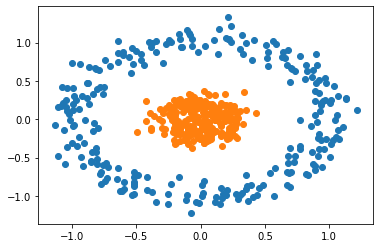

In [4]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [5]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

W1006 22:33:42.703218 4619793856 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1006 22:33:42.718330 4619793856 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1006 22:33:42.720362 4619793856 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [6]:
model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])

W1006 22:33:42.766937 4619793856 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1006 22:33:42.771587 4619793856 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3657: The name tf.log is deprecated. Please use tf.math.log instead.

W1006 22:33:42.775305 4619793856 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
history = model.fit(x=X, y=y, verbose=1, batch_size=20, epochs=100, shuffle='true')

W1006 22:33:42.911050 4619793856 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
500/500 [==============================] - 0s 388us/step - loss: 0.6962 - acc: 0.5140
Epoch 2/100
500/500 [==============================] - 0s 44us/step - loss: 0.6937 - acc: 0.6180
Epoch 3/100
500/500 [==============================] - 0s 42us/step - loss: 0.6926 - acc: 0.5160
Epoch 4/100
500/500 [==============================] - 0s 41us/step - loss: 0.6916 - acc: 0.6780
Epoch 5/100
500/500 [==============================] - 0s 37us/step - loss: 0.6905 - acc: 0.6320
Epoch 6/100
500/500 [==============================] - 0s 34us/step - loss: 0.6890 - acc: 0.3640
Epoch 7/100
500/500 [==============================] - 0s 35us/step - loss: 0.6866 - acc: 0.6440
Epoch 8/100
500/500 [==============================] - 0s 35us/step - loss: 0.6839 - acc: 0.6700
Epoch 9/100
500/500 [==============================] - 0s 35us/step - loss: 0.6798 - acc: 0.7580
Epoch 10/100
500/500 [==============================] - 0s 38us/step - loss: 0.6736 - acc: 0.7940
Epoch 11/100
500/500 [======

Text(0.5, 1.0, 'accuracy')

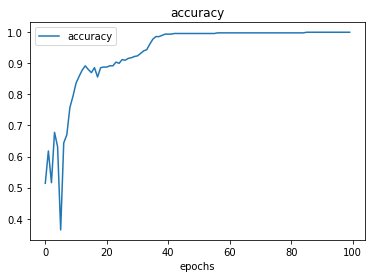

In [8]:
plt.plot(history.history['acc'])
plt.xlabel('epochs')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

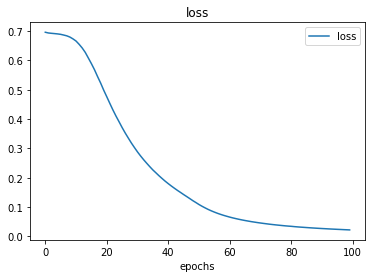

In [9]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.legend(['loss'])
plt.title('loss')

In [10]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0])-0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1])-0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    #xx_, yy_ = xx.ravel(), yy.ravel()
    #print(xx_)
    #print(yy_)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

Prediction is:  [[0.02506577]]


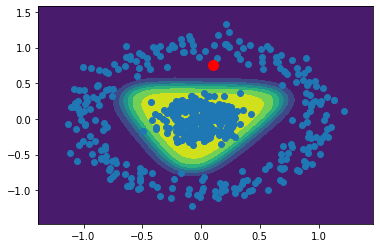

In [11]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_points, 0], X[:n_points, 1])
x= 0.1
y = 0.75
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", prediction)